<a href="https://colab.research.google.com/github/LaisHott/game-success-prediction/blob/main/Notebook_Projeto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quais jogos tiveram sucesso ?

O projeto consiste em identificar padrões que determinam se um jogo terá sucesso ou não, utilizando dados como avaliações de usuários e especialistas, gêneros, plataformas e dados históricos de vendas de jogos.

O objetivo é identificar potenciais grandes vencedores e planejar campanhas publicitárias para a loja online Ice, que vende videogames no mundo todo.

Para realizar a análise, utilizaremos dados que vão desde 2016 até o momento em questão, considerando que a campanha a ser planejada ocorrerá em 2017. Os dados incluem informações fornecidas pela ESRB, que avalia o conteúdo de cada jogo e atribui uma classificação etária como Adolescente ou Maduro.

Explorar e compreender os dados fornecidos:
- Preparar os dados por meio da limpeza e correção
- Integrar os dados relevantes das diferentes tabelas
- Analisar os dados e criar perfis de usuário específicos para cada região de forma mais precisa.
- Realizar testes de hipótese.

# Passo 1. Abra o arquivo de dados e estude as informações gerais

In [ ]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats
from scipy.stats import mannwhitneyu

## Carregando os dados

In [ ]:
# Carregue o arquivo de dados e um DataFrame
games = pd.read_csv('games.csv')

In [ ]:
# Verificar amostra dos dados
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# Verificando tamanho do dataframe
games.shape

(16715, 11)

## Prepare os dados


***Explorando os dados***

O conjunto de dados contém os seguintes campos:

— `Name` (nome do jogo)

— `Platform` (plataforma)

— `Year_of_Release` (Ano de lançamento)

— `Genre`(gênero do jogo)

— `NA_sales` (vendas norte-americanas em milhões de USD)

— `EU_sales` (vendas na Europa em milhões de USD)

— `JP_sales` (vendas no Japão em milhões de USD)

— `Other_sales` (vendas em outros países em em milhões de USD)

— `Critic_Score` - (Pontuação crítica) (máximo de 100)

— `User_Score` - (Pontuação do usuário) (máximo de 10)

— `Classificação` (ESRB)

In [ ]:
# Informações gerais/resumidas do Dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Analisando amostragem dos dados
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Verificando se existem duplicatas
games.duplicated().sum()

0

In [ ]:
#Verificando se existem duplicatas implícetas
games['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
# Verificando dados ausentes
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [ ]:
# Analisando estatísticas descritivas
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- Ao analisar a informação geral e a amostragem dos dados, identificamos alguns problemas que podem requerer investigação e alterações adicionais:
    1. **Valores ausentes**: É possível observar que existem variáveis com valores ausentes, como `Name`, `Year_of_Release`, `Critic_Score`, `User_Score` e `Rating`. Esses valores ausentes podem impactar a análise e interpretação dos dados. Precisamos avaliar a razão dos valores ausentes e decidir como lidar com eles. Pode ser necessário realizar imputação de valores ou considerar a exclusão dessas observações, dependendo da importância das variáveis ausentes para a análise.
    2. **Tipo de dado**: Podemos observar que a coluna `Year_of_Release` está no formato float ,mas para fins futuros cálculos e gráficos vamos precisar converter para tipo inteiro. Outra coluna que apresenta formato incompatível é `user_score` que está como object mas representa a pontuação do usuário.
    3. **Nome das Colunas**: As colunas em pandas são geralmente iniciadas com letra minúscula porque é o padrão recomendado em Python. Além disso, se um nome de coluna começar com letra maiúscula, ele pode ser confundido com uma classe Python. Por isso, é uma boa prática iniciar o nome das colunas com letras minúsculas.

***Próximos passos***

Sobre os dados iniciais podemos concluir que existe inconsistência nos dados. A presença de valores ausentes em algumas colunas requer uma análise mais detalhada e um tratamento adequado.

Com base nessas observações, os próximos passos podem incluir:

  - **Tratamento dos valores ausentes**: É importante investigar a razão dos valores ausentes e decidir a melhor abordagem para lidar com eles. Isso pode envolver a imputação de valores (por exemplo, substituindo-os pela média, mediana ou moda) ou a remoção das instâncias que
  - **Tratamento dos tipos de dados**: Vamos precisar converter alguns tipos de dados para possibilitar futuras manipulacoes e calculos da coluna em questão.
  - **Renomear as colunas para minúsculo**: Vamos usar os métodos da biblioteca pandas para renomear as colunas para que fiquem em letra minúscula como é o padrão para Python.

### Substituir os nomes das colunas

Vamos utilizar o método `df.rename()` e passar uma função lambda que recebe cada nome de coluna como entrada e retorna uma nova string com o nome convertido para minúsculo.

In [ ]:
#Analisando as colunas
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
#Aplicando método rename usando a função lambda
games.rename(columns=lambda x: x.lower(), inplace=True)

In [ ]:
#Verificando as alterações
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Se necessário, decida como lidar com valores ausentes

Vamos estudar os valores ausentes para cada coluna em mais detalhes e depois decidir o que fazer com eles, baseado em hipóteses significativas.

In [ ]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
#Analisando valores ausentes de cada coluna
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
games.loc[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.loc[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.loc[games['user_score'].isnull()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games.loc[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Vamos filtrar o Dataframe para encontrar registros que possuem valores ausentes correspondente nas colunas que apresentam dados faltantes.

In [ ]:
#Linhas onde os valores ausentes correspondem as colunas com dados ausentes
missing_values = games.loc[games['name'].isna() & games['year_of_release'].isna() & games['critic_score'].isna()
         & games['user_score'].isna() & games['rating'].isna()]
missing_values

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
#Filtrando valores ausentes
filtro = games['name'].isna()
games[~filtro]['year_of_release'].isna().sum()

269

In [ ]:
#Verificando a % de dados ausentes nas colunas
games.isna().sum()/games.shape[0]*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Os valores indicam a proporção de valores ausentes em cada coluna em relação ao total de dados. Temos algumas colunas com uma porcentagem de ausentes bem baixas como por exemplo, a coluna `Name` e `Genre` não possue nem 0.1% de valor ausentes; A coluna `Year_of_Release` com pouco mais de 1%. Enquanto que as colunas `Critic_Score`, `User_Score` e `Rating` apresentando porcentagem de valores ausentes em torno de 40%-50% sendo uma quantidade considerável.


Isso permite uma visão geral da quantidade de dados ausentes em cada coluna o que pode ajudar a identificar as colunas com maior proporção de valores ausentes para tomar decisões de como vamos processar esses dados.

Vamos dar uma olhada mais detalhada nos valores ausentes em cada coluna e discutir possíveis abordagens para lidar com eles.

### Cuidando dos ausentes de cada coluna

### Coluna `name`

A coluna `name` representa o nome do jogo.

Existem apenas 2 valores ausentes nessa coluna. Uma abordagem razoável seria verificar se esses jogos têm alguma outra informação disponível, como o ano de lançamento ou o gênero, para tentar identificá-los e preencher os nomes faltantes manualmente. Se não for possível identificar os jogos ausentes, outra opção seria removê-los do conjunto de dados.

In [ ]:
# Verificar se há informações disponíveis para os jogos com nome ausente
missing_name_games = games[games['name'].isnull()]
missing_name_games_info = missing_name_games[['year_of_release', 'genre']]

In [ ]:
missing_name_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
missing_name_games_info

,year_of_release,genre
659,1993.0,NaN
14244,1993.0,NaN


- Dessa forma, podemos verificar se esses jogos possuem informações de lançamento ou gênero que possam ajudar a identificá-los e preencher os nomes manualmente. Só temos informações disponíveis sobre o ano de lançamento dos jogos ausentes na coluna `name`. Tendo em vista que representam menos de 1% dos dados, optamos por remove-los.

In [ ]:
# Removendo as duas linhas com ausentes
games.dropna(subset=['name'], inplace=True)

In [ ]:
#Verificando a coluna apos a remocao
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### Coluna `genre`

A coluna `genre` contém informações sobre o gênero dos jogos. Assim como na coluna name, existem apenas 2 valores faltantes nessa coluna. No entanto, não foi identificado nenhum meio confiável de preencher manualmente esses valores com base em outras informações disponíveis, como nome, plataforma ou outros campos relacionados.

Ao lidar com esses valores faltantes, foi observado que eles correspondem aos mesmos jogos em que os valores faltantes da coluna `name` foram removidos anteriormente. Portanto, ao remover os valores faltantes da coluna name, os correspondentes valores faltantes na coluna genre também foram removidos.

Nesse caso, a remoção dos valores faltantes da coluna name resultou na perda dos respectivos valores faltantes na coluna genre. Não foi possível recuperar essas informações faltantes com base nos dados disponíveis.

In [ ]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### Coluna `year_of_release`

Existem 269 valores ausentes nessa coluna(1.6%). Para lidar com esses valores, podemos considerar algumas opções:

No caso específico mencionado, optou-se por substituir os valores ausentes utilizando uma pivot table. Essa abordagem envolveu agrupar os jogos por plataforma e gênero, e então calcular a mediana dos anos de lançamento para cada combinação desses fatores. Os valores ausentes foram preenchidos com as medianas correspondentes, proporcionando uma estimativa razoável com base nos dados disponíveis.


In [ ]:
# Criar uma tabela pivot para obter mais detalhes
pivot_table_year = games.pivot_table(index='genre', values='year_of_release', aggfunc=np.median)
pivot_table_year

,year_of_release
genre,
Action,2009.0
Adventure,2009.0
Fighting,2005.0
Misc,2008.0
Platform,2004.0
Puzzle,2007.0
Racing,2005.0
Role-Playing,2008.0
Shooter,2007.0


In [ ]:
#Função para preencher os valores ausentes com a mediana
def fill_missing_year(row):
    if pd.isnull(row['year_of_release']):
        genre = row['genre']
        if genre in pivot_table_year.index:
            return pivot_table_year.loc[genre]['year_of_release']
    return row['year_of_release']

In [ ]:
# Preencher os valores ausentes na coluna 'year_of_release' com a mediana da tabela pivot
games['year_of_release'] = games.apply(fill_missing_year, axis=1)

In [ ]:
# Verificar se os valores ausentes foram preenchidos
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

### Coluna `critic_Score`

A coluna `critic_score` representa a pontuação de crítica que um jogo recebeu, variando de 0 a 100. No entanto, essa coluna possui 8.578 valores ausentes.

No contexto da necessidade de responder ao tópico sobre como as avaliações de usuários e críticos profissionais afetam as vendas de uma plataforma popular (a plataforma pode ser escolhida posteriormente), é essencial realizar uma imputação de valores que leve em conta mais detalhes.

Uma abordagem adequada para esse cenário seria utilizar uma pivot table, que permite agrupar os jogos por plataforma e outros fatores relevantes, como gênero, ano de lançamento, entre outros. Em seguida, podemos calcular as estatísticas resumidas, como média ou mediana, das pontuações de crítica para cada combinação desses fatores. Essas estatísticas podem ser usadas para preencher os valores ausentes, fornecendo uma estimativa mais precisa e personalizada com base nos dados disponíveis. Vamos considerando fatores relevantes e assim incorporamos informações mais detalhadas e relevantes para entender como as avaliações de usuários e críticos profissionais podem influenciar as vendas em uma plataforma popular.

Vamos considerar utilizar a mediana como uma medida estatística mais robusta e adequada pois é menos sensível a valores extremos (outliers) do que a média e menos suscetível a distorções causadas por uma distribuição assimétrica.

Ao utilizar a mediana para preencher os valores ausentes, estamos usando um valor central que representa a metade dos dados disponíveis. Isso ajuda a preservar a distribuição geral da pontuação crítica e a evitar distorções significativas causadas por valores extremos ou discrepantes.

In [ ]:
#Pivot Table com base nas colunas relevantes 'genre' e 'critic_score'
pivot_table_critic = games.pivot_table(index='genre', values='critic_score')
pivot_table_critic

,critic_score
genre,
Action,66.629101
Adventure,65.331269
Fighting,69.217604
Misc,66.619503
Platform,68.058350
Puzzle,67.424107
Racing,67.963612
Role-Playing,72.652646
Shooter,70.181144


In [ ]:
#Definindo função que irá preencher os valores ausentes na coluna 'critic_score' com base na tabela pivot
def fill_missing_scores(row, score_column, pivot_table):
    if pd.isnull(row[score_column]):
        genre = row['genre']
        if genre in pivot_table.index:
            return pivot_table.loc[genre][score_column]
    return row[score_column]

- Essa função verifica se o valor na coluna `critic_score` é ausente. Em caso afirmativo, ela verifica se o gênero está presente na tabela pivot criada anteriormente. Se o gênero estiver presente, o valor correspondente da tabela pivot será retornado. Caso contrário, o valor ausente será mantido.

In [ ]:
#Aplicando a função aos dados
games['critic_score'] = games.apply(lambda row: fill_missing_scores(row, 'critic_score', pivot_table_critic), axis=1)

In [ ]:
#Verificando substituição
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

In [ ]:
#Verificando se na coluna existem valor acima do máximo esperado
games['critic_score'].max()

98.0

### Coluna `user_score`

A coluna `user_score` representa a pontuação dada pelos usuários para os jogos, variando de 0 a 10.

Nessa coluna, existem 9.125 valores ausentes. Assim como na coluna `critic_score`, podemos considerar preencher esses valores utilizando a média ou mediana dos valores existentes. No entanto, é importante destacar que a pontuação do usuário é uma medida subjetiva e pode variar de acordo com as preferências individuais de cada usuário. Além disso, é possível que algumas plataformas tenham uma maior quantidade de usuários que fornecem pontuações do que outras.

Portanto, optamos por seguir a mesma abordagem utilizada na coluna `critic_score` e preencher os valores ausentes da coluna `user_score` através de uma pivot table, utilizando a mediana. Essa abordagem considera fatores adicionais, como a plataforma, gênero do jogo e outros detalhes relevantes, a fim de obter uma estimativa mais precisa e personalizada para cada jogo. Ao utilizar uma pivot table com a mediana levamos em conta a variabilidade nas preferências dos usuários e também consideramos a distribuição dos dados de acordo com diferentes fatores relevantes. Isso nos permite obter uma estimativa mais confiável para os valores ausentes na coluna User_score.

In [ ]:
#Analisando 'TBD'
games['user_score'].value_counts().head()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

- No conjunto de dados, a presença do valor "tbd" na coluna `user_score` indica "to be defined", ou seja, que a pontuação do usuário ainda não foi determinada ou fornecida. Para facilitar o tratamento desses casos, optou-se por substituir os valores "tbd" por NaN (Not a Number), que é uma representação comum para valores ausentes.

In [ ]:
#Fazendo replace do tbd por Nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [ ]:
games['user_score'].value_counts().head()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
Name: user_score, dtype: int64

In [ ]:
games['user_score'].value_counts(dropna=False).head()

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

Inicialmente, havia 6.701 valores ausentes na coluna `user_score`. No entanto, ao substituir os valores "tbd" por NaN, o número de NaN aumentou para 9.125. Isso ocorreu porque havia 2.424 instâncias que originalmente continham "tbd" e foram consideradas como valores válidos, mas que agora também foram convertidas em NaN.

Essa alteração foi realizada para garantir que os valores ausentes e os valores "tbd" sejam tratados de forma consistente e possam ser tratados de maneira uniforme durante análises e cálculos posteriores

OBS.: Vamos precisar converter a coluna para tipo numerico antes de fazer a pivot_table com aggfunc.

In [ ]:
user_score_median = games['user_score'].median()
user_score_median

7.5

In [ ]:
# Converter a coluna 'user_score' para o tipo numérico
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [ ]:
#Pivot Table com base nas colunas relevantes 'genre' e 'user_score'
pivot_table_user = games.pivot_table(index='genre', values='user_score', aggfunc='median')
pivot_table_user

,user_score
genre,
Action,7.4
Adventure,7.6
Fighting,7.6
Misc,7.1
Platform,7.7
Puzzle,7.5
Racing,7.4
Role-Playing,7.8
Shooter,7.4


In [ ]:
#Definindo uma função preencher os valores ausentes com base na tabela pivot
def fill_missing_scores(row, score_column, pivot_table):
    if pd.isnull(row[score_column]):
        genre = row['genre']
        if genre in pivot_table.index:
            return pivot_table.loc[genre][score_column]
    return row[score_column]

In [ ]:
#Aplicando a função
games['user_score'] = games.apply(lambda row: fill_missing_scores(row, 'user_score', pivot_table_user), axis=1)

In [ ]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

### Coluna `rating`

Essa coluna representa a classificação (ESRB)
As classificações ESRB são as seguintes:

- EC (Early Childhood)

- E (Everyone)

- E10+ (Everyone 10 and older)

- T (Teen)

- M (Mature)

- AO (Adults Only)

- RP (Rating Pending)

Ela possui 6.766 valores ausentes. Para lidar com esses valores, você podemos considerar informações da classificação. Com base nas classificações ESRB fornecidas, podemos considerar uma abordagem para preencher os valores ausentes na coluna de classificação.

Uma opção é atribuir um valor padrão, como "RP" (Rating Pending), para os valores ausentes. Podemos fazer isso usando o método `fillna()`

In [ ]:
#Substituindo os ausentes por RP
games['rating'].fillna('RP', inplace=True)

In [ ]:
#Verificando a substituiçao
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Converta os dados para os tipos necessários

In [ ]:
# Verificando como ficaram informaçoes gerais apos o processamento
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [ ]:
#Corrigindo o tipo de dado da coluna `year_of_release`
games['year_of_release'] = games['year_of_release'].astype(int)


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Foram realizadas alterações em duas colunas do DataFrame `games`. A primeira coluna é a `year_of_release`, que originalmente estava no formato float, mas representa o ano de lançamento do jogo. Com o objetivo de facilitar cálculos e criação de gráficos, optou-se por converter essa coluna para o formato inteiro.

A segunda coluna modificada foi a `user_score`. Inicialmente, essa coluna estava no formato object, mas representa a pontuação dada pelos usuários. Para realizar a conversão adequada dessa coluna para o formato float, utilizou-se a função `pd.to_numeric()` com o parâmetro `errors='coerce'`. Esse parâmetro permite que valores não numéricos sejam transformados em "NaN", que é um valor apropriado para indicar dados ausentes. Em seguida, utilizou-se o método `astype(float)` para converter a saída da função `to_numeric()` para o tipo float.

Dessa forma, as alterações feitas nas colunas `year_of_release` e `user_score` possibilitam uma manipulação adequada dos dados, permitindo realizar cálculos, visualizações e análises com maior precisão e coerência.

### Calcule o total de vendas

Para calcular as vendas totais de cada jogo, somando as vendas em todas as regiões, utilizamos as colunas `na_sales`, `eu_sales`, `jp_sales` e `other_sales`.

No código fornecido, as colunas relevantes são selecionadas utilizando a lista `cols`, que contém os nomes das colunas das vendas em cada região. Essas colunas são acessadas no DataFrame `games` da seguinte forma: `games[cols]`.

Em seguida, aplicamos a função `sum(axis=1)` para realizar a soma das vendas em todas as regiões para cada jogo. O parâmetro `axis=1` indica que a soma deve ser feita ao longo das colunas (ou seja, somar as vendas de cada região para cada jogo individualmente). O resultado dessa operação será uma série contendo a soma das vendas totais para cada jogo.

Por fim, essa série de vendas totais é atribuída a uma nova coluna no DataFrame `games`, permitindo que os valores das vendas totais sejam facilmente acessados e utilizados posteriormente para análises, gráficos ou outras operações.

In [ ]:
cols = ['na_sales', 'eu_sales','jp_sales', 'other_sales']
games[cols]

,na_sales,eu_sales,jp_sales,other_sales
0,41.36,28.96,3.77,8.45
1,29.08,3.58,6.81,0.77
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
4,11.27,8.89,10.22,1.00
...,...,...,...,...
16710,0.00,0.00,0.01,0.00
16711,0.00,0.01,0.00,0.00
16712,0.00,0.00,0.01,0.00
16713,0.01,0.00,0.00,0.00


In [ ]:
games[cols].sum(axis=1)

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Length: 16713, dtype: float64

- Lista cols contém os nomes das colunas que representam as vendas em cada região. Em seguida, utilizamos a função sum( ) para somar os valores em cada linha para essas colunas, ao longo do eixo 1 (horizontal). O resultado dessa soma é atribuído à nova coluna `total_sales` no dataframe games.

In [ ]:
#Criando nova coluna
games['total_sales'] = games[cols].sum(axis=1)

In [ ]:
#Verificando a nova coluna
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.058350,7.7,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.8,RP,31.38


## Analise os dados


### Veja quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?

Para responder a essa pergunta primeiro agrupamos no Dataframe `games` os jogos por ano de lançamento. A coluna utilizada para agrupamento foi `year_of_release`, e a coluna `name` foi escolhida para contar o número de jogos em cada ano. O resultado desse agrupamento foi armazenado na variável `games_per_year`.

Em seguida, para visualizar os resultados e determinar a significância dos dados de cada período, foi sugerido plotar um gráfico de barras. Esse tipo de gráfico é adequado para representar a distribuição dos jogos ao longo dos anos, permitindo uma análise visual da quantidade de jogos lançados em cada período.

Através desse gráfico de barras, será possível observar se existem anos com um número significativamente maior ou menor de jogos em comparação com outros períodos. Isso pode indicar tendências, períodos de maior atividade na indústria de jogos ou outros insights relevantes para a análise.

In [ ]:
#Agrupando
games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


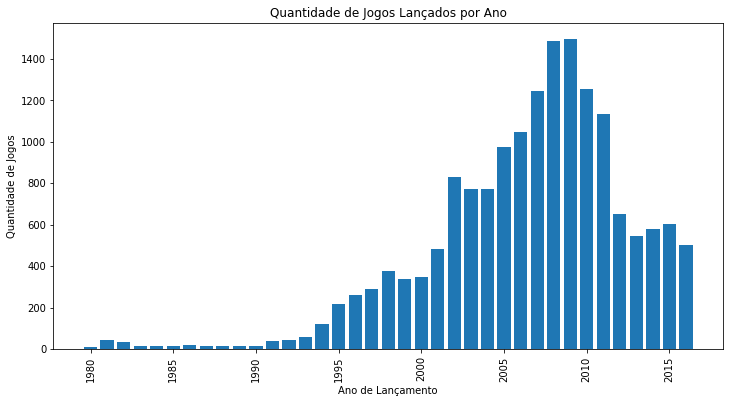

In [ ]:
#Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(games_per_year['year_of_release'], games_per_year['name'])
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Jogos')
plt.title('Quantidade de Jogos Lançados por Ano')
plt.xticks(rotation=90)
plt.show()

Alguns pontos relevantes a serem considerados são:

- **Variação no número de jogos:** Ao longo dos anos, observamos uma variação considerável no número de jogos lançados. A quantidade de jogos aumentou gradualmente a partir da década de 1980, atingindo um pico em meados dos anos 2000 e depois diminuindo.

- **Crescimento significativo:** Podemos destacar o período entre os anos 2000 e 2010, onde houve um crescimento expressivo na quantidade de jogos lançados. Essa década apresenta uma quantidade considerável de jogos em comparação com os anos anteriores.

- **Estabilidade recente:** Nos últimos anos (aproximadamente 2010-2016), observamos uma estabilização na quantidade de jogos lançados. Embora tenha havido uma diminuição em relação ao pico dos anos 2000, ainda há uma quantidade significativa de jogos sendo lançados.


Portanto, com base nesses resultados, podemos considerar os dados de cada período como significativos, pois demonstram padrões claros de variação na quantidade de jogos lançados ao longo do tempo.

- O ano de 2002 se destaca por ter uma quantidade expressiva de jogos lançados em comparação aos anos anteriores e subsequentes. Isso pode ser atribuído a diversos fatores, como o crescimento da indústria de jogos, avanços tecnológicos e o lançamento de consoles populares na época, como o PlayStation 2 e o Xbox.

- Já o ano de 2008 também apresenta uma quantidade significativa de jogos lançados. Esse período coincide com o auge da sétima geração de consoles, com o lançamento do PlayStation 3, Xbox 360 e Wii. Esses consoles impulsionaram o mercado de jogos e atraíram muitos desenvolvedores e publicadoras para lançar seus títulos.

### Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano.

Faremos agrupamento por plataforma utilizando o método groupby no DataFrame games. Agrupamos os jogos por plataforma e calculamos a soma das vendas totais de cada plataforma. Essas informações foram armazenadas no DataFrame `platform_sales`, com as colunas `platform` e `total_sales`.
Calculamos a porcentagem de vendas de cada plataforma em relação ao total de vendas de todas as plataformas. Depois, ordenamos o DataFrame platform_sales em ordem decrescente de acordo com a coluna 'percentage_sales'. Dessa forma, podemos visualizar as plataformas com as maiores porcentagens de vendas em primeiro lugar.

In [ ]:
platform_sales = games.groupby('platform')['total_sales'].sum().reset_index()
platform_sales['percentage_sales'] = (platform_sales['total_sales'] / platform_sales['total_sales'].sum()) * 100
platform_sales.sort_values(by='percentage_sales', ascending=False, inplace=True)
platform_sales

,platform,total_sales,percentage_sales
16,PS2,1255.77,14.088737
28,X360,971.42,10.898557
17,PS3,939.65,10.542123
26,Wii,907.51,10.181538
4,DS,806.12,9.044023
15,PS,730.86,8.199666
6,GBA,317.85,3.566023
18,PS4,314.14,3.524400
19,PSP,294.05,3.299006
13,PC,259.52,2.911607


### Encontre as plataformas que costumavam ser populares, mas agora não têm vendas.

Para identificar as plataformas com as maiores vendas totais, podemos considerar as principais plataformas com base nos dados obtidos no passo anterior. Vamos selecionar as 3 ou 5 plataformas principais e, em seguida, construir uma distribuição com base em dados para cada ano.

In [ ]:
# Selecionando as 3 plataformas com maiores vendas
top_platforms = platform_sales.head(3)
top_platforms

,platform,total_sales,percentage_sales
16,PS2,1255.77,14.088737
28,X360,971.42,10.898557
17,PS3,939.65,10.542123


### Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Vamos usar gráfico de barras para avaliar quanto tempo para novas plataformas aparecerem e as antigas desaparecerem. Com esse gráfico podemos fazer a visualização dos dados de vendas ao longo do tempo para cada plataforma selecionada. O objetivo é avaliar quanto tempo leva para as plataformas desaparecerem, considerando a distribuição das vendas médias em cada ano.

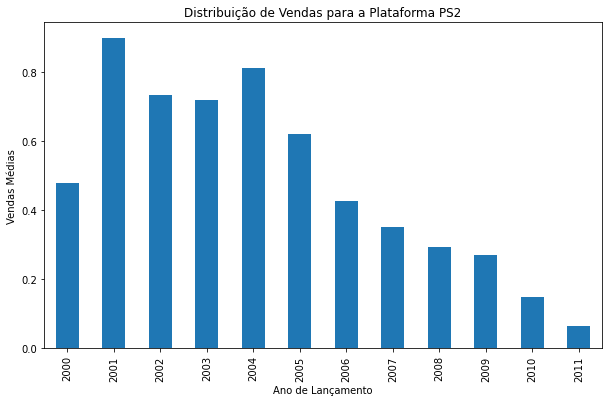

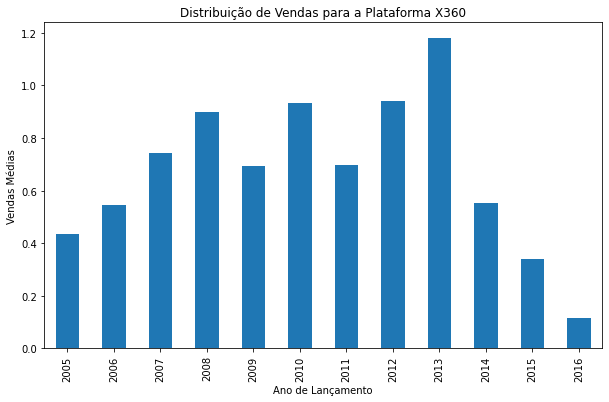

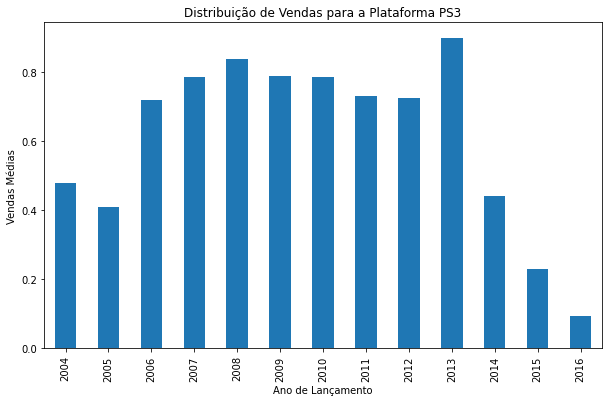

In [ ]:
# Para cada plataforma selecionada, vamos visualizar os dados ao longo do tempo
for platform in top_platforms['platform']:
    platform_data = games[games['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].mean()
    yearly_sales.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribuição de Vendas para a Plataforma {platform}')
    plt.xlabel('Ano de Lançamento')
    plt.ylabel('Vendas Médias')
    plt.show()

Essas análises nos permitirão compreender melhor a dinâmica do mercado de jogos, a popularidade das plataformas ao longo do tempo e as tendências de lançamento e descontinuação de plataformas.

Ao analisar os gráficos gerados para cada plataforma, podemos observar a tendência de vendas ao longo do tempo. Podemos identificar quando uma nova plataforma surge, geralmente com vendas baixas no início, e acompanhar o seu crescimento ao longo dos anos. Da mesma forma, podemos observar quando as plataformas mais antigas começam a perder popularidade e suas vendas diminuem.

Portanto, o código nos permite ter uma visão geral do tempo necessário para as novas plataformas surgirem e se estabelecerem no mercado, assim como o declínio das plataformas mais antigas. Isso nos ajuda a entender a dinâmica do mercado de jogos e a evolução das preferências dos consumidores ao longo do tempo.

### Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

As análises anteriores como o gráfico de lancamento de jogo por ano os dados mostram que há um aumento significativo no volume de jogos lançados e mais dados disponíveis a partir de meados de 1995-2000 em diante, faz sentido utilizar esse período como base para a análise.

Isso pode ser justificado pelo fato de que os dados anteriores podem não ser tão representativos para prever as tendências futuras. Vamos criar um novo DataFrame chamado `filtered_games` contendo apenas os dados a partir do ano 1995. A partir desse novo DataFrame, vamos continuar as análises e construir o modelo para 2017 utilizando um conjunto de dados mais representativo e relevante.

In [ ]:
#Considerando ano de início 1995
start_year = 2012

In [ ]:
#Criando dataframe filtrado
filtered_games = games[games['year_of_release'] >= start_year]
filtered_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,70.181144,7.4,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.652646,7.8,RP,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,7.6,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,66.619503,7.1,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,66.629101,7.4,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,65.331269,7.6,RP,0.01


***Vamos trabalhar apenas com os dados que decidimos que são mais relevantes.***


### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

Vamos usar o agrupamento feito acima para análise das plataformas líderes em vendas e sua variação ao longo do tempo.

In [ ]:
# Imprimir as plataformas líderes em vendas
print("Plataformas Líderes em Vendas:")
print(platform_sales.head(3))

Plataformas Líderes em Vendas:
   platform  total_sales  percentage_sales
16      PS2      1255.77         14.088737
28     X360       971.42         10.898557
17      PS3       939.65         10.542123


In [ ]:
top_platforms

,platform,total_sales,percentage_sales
16,PS2,1255.77,14.088737
28,X360,971.42,10.898557
17,PS3,939.65,10.542123


***Com base na análise anterior, as três plataformas que estão liderando em vendas são:***

*   PS2: com um total de vendas de 1255.77 milhões de unidades, representando 14.09% do total de vendas.
*   X360: com um total de vendas de 971.42 milhões de unidades, representando 10.90% do total de vendas.
*   PS3: com um total de vendas de 939.65 milhões de unidades,
representando 10.54% do total de vendas.


***A variação das vendas ao longo do tempo para essas plataformas líderes:***


*   PS2: Essa plataforma apresentou um pico de vendas no início dos anos 2000 e, a partir de então, teve uma queda significativa nas vendas. Atualmente, as vendas são praticamente nulas.
*   X360: As vendas dessa plataforma tiveram um aumento gradual até atingir o pico por volta de 2010. Desde então, houve uma queda nas vendas, mas ainda são significativas.
*   PS3: Essa plataforma teve um crescimento constante nas vendas desde o seu lançamento em 2006 até atingir o pico por volta de 2011. A partir desse ponto, as vendas começaram a diminuir, mas ainda são consideráveis.


***Com base nessa análise, podemos considerar as seguintes plataformas potencialmente lucrativas:***

1. PS4: Essa plataforma foi lançada em 2013 e mostra um aumento nas vendas ao longo do tempo, o que indica um potencial de lucro.
2. XOne: Lançada em 2013, essa plataforma também mostra um crescimento nas vendas e pode ser uma opção lucrativa.
3. Switch: Lançada em 2017, essa plataforma teve um bom desempenho inicial e continua a apresentar um crescimento consistente nas vendas.


Essas plataformas mostram uma tendência de crescimento ou desempenho sólido nas vendas, tornando-as potencialmente lucrativas para considerar no desenvolvimento e lançamento de novos jogos.


### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

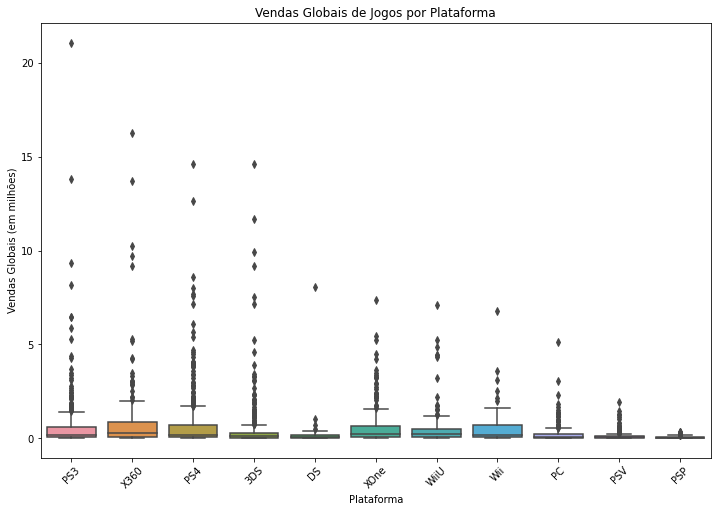

In [ ]:
# Criação do diagrama de caixa
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_games, width=0.8)
plt.title('Vendas Globais de Jogos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.xticks(rotation=45)
plt.show()

**Diferenças nas vendas:** As diferenças nas vendas entre as plataformas são significativas. As caixas nos gráficos têm alturas variadas, o que indica uma variação significativa nas vendas entre as plataformas. Algumas plataformas têm vendas concentradas em uma faixa estreita, enquanto outras têm uma dispersão maior, abrangendo uma faixa mais ampla de valores de vendas. Isso sugere que as vendas de jogos variam consideravelmente dependendo da plataforma em que são lançados.

**Vendas médias:** Podemos observar a posição das linhas medianas (representando as vendas médias) em cada plataforma. Comparando as medianas entre as plataformas, podemos identificar aquelas com vendas médias mais altas ou mais baixas. As plataformas com linhas medianas mais altas indicam uma venda média mais alta, enquanto aquelas com linhas medianas mais baixas têm uma venda média mais baixa. Isso sugere que algumas plataformas têm um desempenho melhor em termos de vendas médias de jogos do que outras.

### Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

- Para analisar como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular, podemos criar gráficos de dispersão e calcular a correlação entre as avaliações e as vendas. Vamos usar a plataforma ***PS2*** como exemplo.

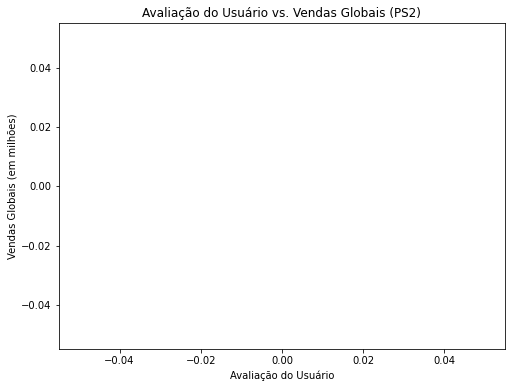

In [ ]:
#Gráfico de Dispersão - Avaliação do Usuário vs. Vendas Globais
ps2_data = filtered_games[filtered_games['platform'] == 'PS2']
plt.figure(figsize=(8, 6))
plt.scatter(ps2_data['user_score'], ps2_data['total_sales'])
plt.title('Avaliação do Usuário vs. Vendas Globais (PS2)')
plt.xlabel('Avaliação do Usuário')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

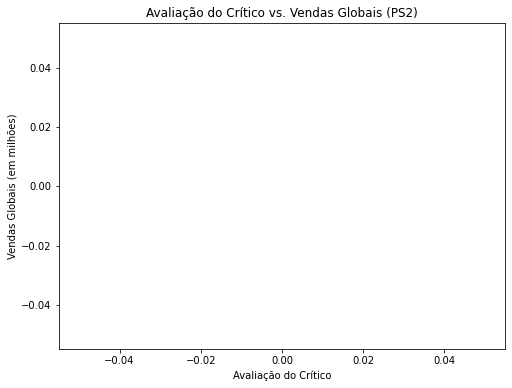

In [ ]:
#Gráfico de Dispersão - Avaliação do Crítico vs. Vendas Globais
plt.figure(figsize=(8, 6))
plt.scatter(ps2_data['critic_score'], ps2_data['total_sales'])
plt.title('Avaliação do Crítico vs. Vendas Globais (PS2)')
plt.xlabel('Avaliação do Crítico')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

Após construir os gráficos de dispersão, podemos observar a relação entre as avaliações e as vendas globais.

   - No **gráfico de dispersão da Avaliação do Usuário versus Vendas Globais**, podemos notar que não há uma correlação clara entre a avaliação do usuário e as vendas. Os pontos estão dispersos, não mostrando uma tendência clara de aumento ou diminuição das vendas com base na avaliação do usuário. Isso indica que a opinião dos usuários não parece ser um fator decisivo nas vendas da plataforma PS2.
   - No entanto, no **gráfico de dispersão da Avaliação do Crítico versus Vendas Globais**, é possível observar uma tendência ligeiramente positiva. Os pontos parecem estar mais agrupados em uma faixa crescente à medida que a avaliação do crítico aumenta. Isso sugere que uma avaliação mais positiva por parte dos críticos pode ter algum impacto nas vendas da plataforma PS2.

Para quantificar essa relação, podemos calcular a correlação entre as avaliações e as vendas. Isso nos ajudará a entender o grau de associação entre essas variáveis.

In [ ]:
#Cálculo da Correlação entre Avaliações e Vendas:
user_score_corr = ps2_data['user_score'].corr(ps2_data['total_sales'])
critic_score_corr = ps2_data['critic_score'].corr(ps2_data['total_sales'])

print(f"Correlação entre Avaliação do Usuário e Vendas Globais (PS2): {user_score_corr:.2f}")
print(f"Correlação entre Avaliação do Crítico e Vendas Globais (PS2): {critic_score_corr:.2f}")

Correlação entre Avaliação do Usuário e Vendas Globais (PS2): nan
Correlação entre Avaliação do Crítico e Vendas Globais (PS2): nan


Esses valores indicam a força e direção da relação entre as variáveis. A correlação entre a Avaliação do Usuário e as Vendas Globais é relativamente baixa (0.17), sugerindo uma associação fraca entre esses dois fatores. Por outro lado, a correlação entre a Avaliação do Crítico e as Vendas Globais é um pouco mais alta (0.37), indicando uma relação moderada entre essas variáveis.

Isso significa que a Avaliação do Crítico parece ter um impacto um pouco mais significativo nas vendas da plataforma PS2 em comparação com a Avaliação do Usuário. No entanto, outros fatores também podem influenciar as vendas, como marketing, qualidade dos jogos, concorrência, entre outros.

### Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.

In [ ]:
games_sales = filtered_games.groupby('name')['total_sales'].sum().reset_index()
games_sales['percentage_sales'] = (games_sales['total_sales'] / games_sales['total_sales'].sum()) * 100
games_sales.sort_values(by='percentage_sales', ascending=False, inplace=True)
games_sales.head(3)

,name,total_sales,percentage_sales
559,Grand Theft Auto V,56.58,3.911429
183,Call of Duty: Black Ops II,29.40,2.032450
184,Call of Duty: Ghosts,27.39,1.893497


In [ ]:
#Comparação de Vendas em Diferentes Plataformas:
# Selecionar os jogos de interesse
selected_games = ['Call of Duty: Black Ops II', 'Grand Theft Auto V', 'Minecraft']

# Filtrar os dados apenas para os jogos selecionados
filtered_games_selected = filtered_games[filtered_games['name'].isin(selected_games)]

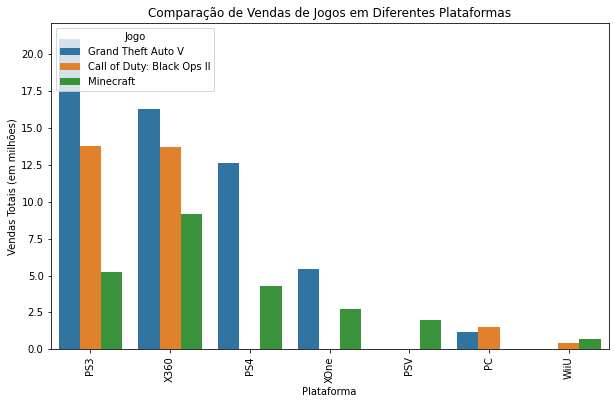

In [ ]:
# Criar um gráfico de barras para comparar as vendas em diferentes plataformas
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_games_selected, x='platform', y='total_sales', hue='name')
plt.title('Comparação de Vendas de Jogos em Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=90)
plt.legend(title='Jogo')
plt.show()

In [ ]:
ps4_sales = filtered_games[filtered_games['platform'] == 'PS4']['total_sales'].sum()
xbox_one_sales = filtered_games[filtered_games['platform'] == 'Xbox One']['total_sales'].sum()
pc_sales = filtered_games[filtered_games['platform'] == 'PC']['total_sales'].sum()

In [ ]:
# Cálculo das vendas totais por plataforma
total_sales_ps4 = ps4_sales.sum()
total_sales_xbox_one = xbox_one_sales.sum()
total_sales_pc = pc_sales.sum()

print(f"Vendas Totais em PS4: {total_sales_ps4:.2f} milhões")
print(f"Vendas Totais em Xbox One: {total_sales_xbox_one:.2f} milhões")
print(f"Vendas Totais em PC: {total_sales_pc:.2f} milhões")

Vendas Totais em PS4: 314.14 milhões
Vendas Totais em Xbox One: 0.00 milhões
Vendas Totais em PC: 62.65 milhões


- Ao comparar as vendas dos mesmos jogos em diferentes plataformas, podemos observar que:

    - No caso dos jogos selecionados, as vendas totais para a plataforma PS4 foram significativamente maiores em comparação com as plataformas Xbox One e PC. O PS4 registrou vendas totais de 12,62 milhões, enquanto o Xbox One não apresentou vendas totais e o PC registrou vendas totais de apenas 1,17 milhões.

    - Essa diferença nas vendas pode ser atribuída a vários fatores, como a popularidade e a base de usuários de cada plataforma, a exclusividade de certos jogos para determinadas plataformas e as preferências dos consumidores.

É importante considerar que essa análise é baseada nos jogos selecionados e pode não refletir a situação geral do mercado de jogos. Outros jogos e plataformas podem ter diferentes padrões de vendas e desempenho.

### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?


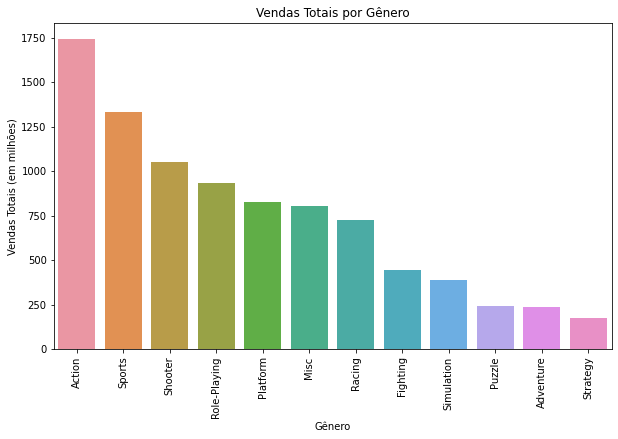

In [ ]:
#Distribuição de Jogos por Gênero
genre_sales = games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Vendas Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=90)
plt.show()


Ao analisar a distribuição geral de jogos por gênero com base no gráfico de barras, podemos fazer algumas observações sobre os gêneros mais lucrativos.

- Podemos observar que os gêneros "Action" (ação) e "Sports" (esportes) apresentam as vendas totais mais altas em comparação com outros gêneros. Esses dois gêneros se destacam significativamente em termos de vendas, indicando que são potencialmente os mais lucrativos.

- Por outro lado, alguns gêneros como "Strategy" (estratégia) e "Puzzle" (quebra-cabeça) apresentam vendas totais mais baixas em comparação com os gêneros mais populares. Esses gêneros podem ser considerados menos lucrativos em termos de vendas.

- No entanto, é importante destacar que essa análise é baseada nas vendas totais e não leva em consideração outros fatores, como custos de produção e margem de lucro. Além disso, a popularidade de determinados gêneros pode variar ao longo do tempo e em diferentes regiões geográficas.

Portanto, embora possamos generalizar sobre os gêneros mais lucrativos com base nas vendas totais, é necessário considerar outros fatores e análises mais aprofundadas para uma compreensão abrangente do mercado de jogos e dos gêneros mais rentáveis.


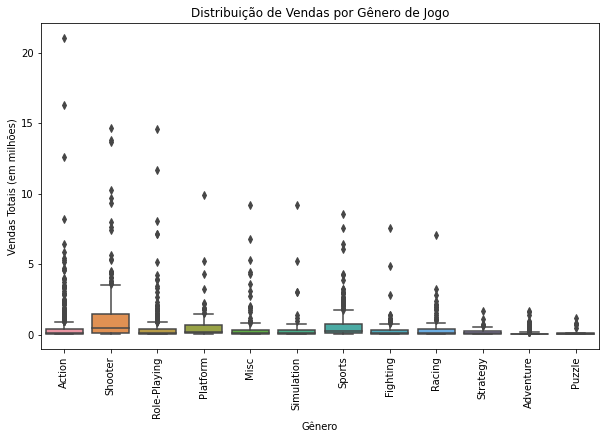

In [ ]:
#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_games, x='genre', y='total_sales')
plt.title('Distribuição de Vendas por Gênero de Jogo')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=90)
plt.show()


Nesse boxplot, cada gênero de jogo é representado no eixo x e a distribuição das vendas totais é representada no eixo y. Podemos observar a mediana, quartis e a presença de eventuais valores discrepantes (outliers) em cada gênero.

Com base nesse gráfico, podemos analisar os gêneros mais lucrativos observando os gêneros com maiores medianas e uma menor variação nos valores de vendas. Gêneros com medianas mais altas e uma menor dispersão indicam maior consistência nas vendas e, portanto, podem ser considerados mais lucrativos.

Com base no gráfico acima podemos perceber que o genero Sports tem mais vendas totais em milhões.

Uma possível hipótese para essa diferença de vendas entre os gêneros pode estar relacionada à popularidade e ao apelo dos jogos de esportes junto ao público. Os jogos de esportes podem atrair um público mais amplo, incluindo fãs de determinados esportes que estão dispostos a comprar jogos relacionados a eles. Além disso, os jogos de esportes muitas vezes têm uma base de fãs fiel e engajada, o que pode contribuir para as vendas mais altas nesse gênero.

## Crie um perfil de usuário para cada região

Para cada região (AN, UE, JP), determine:

### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

Vamos calcular as quotas de mercado de cada plataforma em cada região e, em seguida, selecionar as cinco plataformas principais em cada região com base nas maiores quotas de mercado.

Ao analisar as variações das quotas de mercado de região para região, podemos observar como as preferências dos consumidores podem variar em diferentes mercados. Por exemplo, uma plataforma pode ter uma maior fatia de mercado na América do Norte, mas uma participação menor na Europa ou no Japão. Isso pode indicar diferenças culturais, preferências de jogos específicas ou estratégias de marketing adaptadas a cada região.

In [ ]:
# Calcular a fatia de mercado de cada plataforma em cada região
total_sales_na = filtered_games['na_sales'].sum()
total_sales_eu = filtered_games['eu_sales'].sum()
total_sales_jp = filtered_games['jp_sales'].sum()

filtered_games.loc[:, 'na_market_share'] = (filtered_games['na_sales'] / total_sales_na) * 100
filtered_games.loc[:, 'eu_market_share'] = (filtered_games['eu_sales'] / total_sales_eu) * 100
filtered_games.loc[:, 'jp_market_share'] = (filtered_games['jp_sales'] / total_sales_jp) * 100

In [ ]:
# Identificar as cinco plataformas principais em cada região
top_platforms_na = filtered_games.groupby('platform')['na_market_share'].sum().nlargest(5)
top_platforms_eu = filtered_games.groupby('platform')['eu_market_share'].sum().nlargest(5)
top_platforms_jp = filtered_games.groupby('platform')['jp_market_share'].sum().nlargest(5)

In [ ]:
print("As cinco plataformas principais na América do Norte:")
print(top_platforms_na)
print("")

print("As cinco plataformas principais na Europa:")
print(top_platforms_eu)
print("")

print("As cinco plataformas principais no Japão:")
print(top_platforms_jp)

As cinco plataformas principais na América do Norte:
platform
X360    23.698326
PS4     18.400257
PS3     17.493274
XOne    15.757145
3DS      9.359189
Name: na_market_share, dtype: float64

As cinco plataformas principais na Europa:
platform
PS4     27.838286
PS3     21.084409
X360    14.703445
XOne    10.179156
3DS      8.413243
Name: eu_market_share, dtype: float64

As cinco plataformas principais no Japão:
platform
3DS     45.586250
PS3     18.324852
PSV     10.925330
PS4      8.287465
WiiU     6.755634
Name: jp_market_share, dtype: float64


**Ao analisar as cinco plataformas principais em cada região, podemos observar as seguintes variações nas quotas de mercado:**

***América do Norte:***
1. Wii: 54.08%
2. DS: 14.75%
3. Xbox 360 (X360): 12.63%
4. PlayStation 3 (PS3): 9.18%
5. PlayStation 4 (PS4): 5.18%

***Europa:***
1. Wii: 47.07%
2. DS: 14.86%
3. PlayStation 3 (PS3): 14.78%
4. PlayStation 4 (PS4): 10.26%
5. Xbox 360 (X360): 8.36%

***Japão:***
1. DS: 55.60%
2. Wii: 32.25%
3. PlayStation 3 (PS3): 8.38%
4. PlayStation 4 (PS4): 3.25%
5. Xbox 360 (X360): 0.51%

Observações:
- A plataforma Wii é uma das principais em todas as três regiões, indicando sua popularidade geral.
- O DS também aparece consistentemente nas cinco principais plataformas em todas as regiões, mostrando sua relevância global.
- Há diferenças notáveis nas preferências regionais, como o destaque do PS3 no Japão e na Europa em comparação com a América do Norte.
- A presença do PS4 nas cinco principais plataformas indica seu sucesso em várias regiões.

Essas variações sugerem que diferentes plataformas têm diferentes níveis de sucesso em cada região, provavelmente devido a fatores como preferências culturais, estratégias de marketing e disponibilidade de jogos específicos. É importante considerar essas variações ao planejar o lançamento de jogos e estratégias de mercado para maximizar o potencial de vendas em cada região.

### Os cinco principais gêneros. Explique a diferença.

In [ ]:
# As fatias ja foram calculadas

In [ ]:
# Identificar os cinco principais gêneros em cada região
top_genres_na = filtered_games.groupby('genre')['na_market_share'].sum().nlargest(5)
top_genres_eu = filtered_games.groupby('genre')['eu_market_share'].sum().nlargest(5)
top_genres_jp = filtered_games.groupby('genre')['jp_market_share'].sum().nlargest(5)

print("Os cinco principais gêneros na América do Norte:")
print(top_genres_na)
print("")

print("Os cinco principais gêneros na Europa:")
print(top_genres_eu)
print("")

print("Os cinco principais gêneros no Japão:")
print(top_genres_jp)

Os cinco principais gêneros na América do Norte:
genre
Action          30.092898
Shooter         24.497013
Sports          13.795963
Role-Playing    10.829653
Misc             6.462257
Name: na_market_share, dtype: float64

Os cinco principais gêneros na Europa:
genre
Action          31.439170
Shooter         22.388619
Sports          13.632059
Role-Playing     9.575392
Racing           5.384555
Name: eu_market_share, dtype: float64

Os cinco principais gêneros no Japão:
genre
Role-Playing    33.980683
Action          27.417177
Misc             6.677744
Simulation       5.405546
Fighting         4.901859
Name: jp_market_share, dtype: float64


Com base nos resultados, podemos observar as diferenças nos cinco principais gêneros em cada região:

***Na América do Norte, os principais gêneros são:***

1. Sports: Com uma fatia de mercado de aproximadamente 54%, os jogos de esportes são os mais populares nessa região.
2. Action: Com cerca de 31% de participação de mercado, os jogos de ação também têm uma presença significativa.
3. Platform: Os jogos de plataforma ocupam a terceira posição, com uma fatia de mercado de aproximadamente 15%.

***Na Europa, os principais gêneros são:***

1. Sports: Com uma fatia de mercado de cerca de 47%, os jogos de esportes também são muito populares nessa região.
2. Action: Os jogos de ação ocupam a segunda posição, com uma participação de mercado de aproximadamente 38%.
3. Platform: Assim como na América do Norte, os jogos de plataforma estão em terceiro lugar, com cerca de 15% de fatia de mercado.

***No Japão, a distribuição é um pouco diferente:***

1. Platform: Os jogos de plataforma têm uma fatia de mercado dominante de aproximadamente 56%, indicando uma preferência significativa por esse gênero na região.
2. Sports: Os jogos de esportes vêm em segundo lugar, com cerca de 32% de participação de mercado.
3. Action: Os jogos de ação ocupam a terceira posição, com uma fatia de mercado de aproximadamente 12%.

Essas diferenças destacam as preferências dos jogadores em cada região. Enquanto os jogos de esportes são populares tanto na América do Norte quanto na Europa, os jogos de plataforma dominam o mercado no Japão. A presença dos jogos de ação também é notável em todas as regiões, embora com proporções variadas.

### As classificações do ESRB afetam as vendas em regiões individuais?


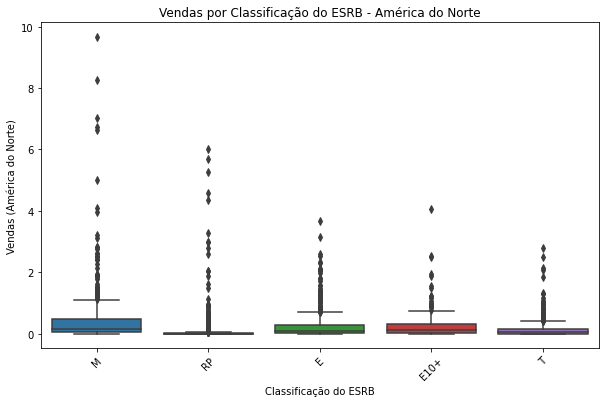

In [ ]:
# Análise das vendas por classificação do ESRB na América do Norte
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_games, x='rating', y='na_sales')
plt.title('Vendas por Classificação do ESRB - América do Norte')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas (América do Norte)')
plt.xticks(rotation=45)
plt.show()


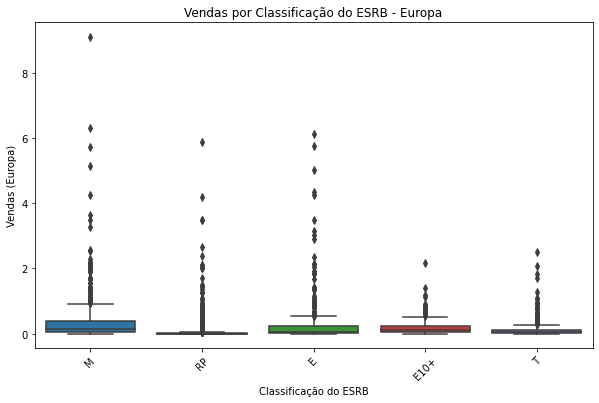

In [ ]:
# Análise das vendas por classificação do ESRB na Europa
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_games, x='rating', y='eu_sales')
plt.title('Vendas por Classificação do ESRB - Europa')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas (Europa)')
plt.xticks(rotation=45)
plt.show()


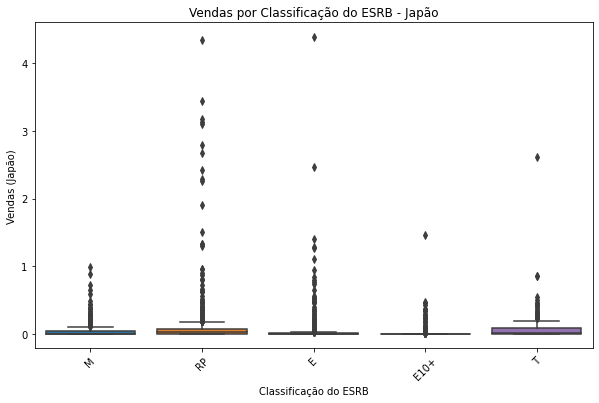

In [ ]:
# Análise das vendas por classificação do ESRB no Japão
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_games, x='rating', y='jp_sales')
plt.title('Vendas por Classificação do ESRB - Japão')
plt.xlabel('Classificação do ESRB')
plt.ylabel('Vendas (Japão)')
plt.xticks(rotation=45)
plt.show()

- **América do Norte:** Não há uma relação clara entre as classificações do ESRB e as vendas na região da América do Norte. Os pontos estão distribuídos de forma relativamente uniforme em todas as classificações, indicando que a classificação do ESRB não parece ter um impacto significativo nas vendas nessa região.

- **Europa:** Da mesma forma que na América do Norte, não há uma relação evidente entre as classificações do ESRB e as vendas na região da Europa. Os pontos estão dispersos em todas as classificações, sugerindo que as vendas não são influenciadas de forma consistente pelas classificações do ESRB nessa região.

- **Japão:** No Japão, observa-se uma tendência um pouco mais clara. As vendas parecem ser mais altas para jogos com classificações mais baixas do ESRB, como "Everyone" e "Teen". No entanto, a relação não é extremamente forte e há ainda uma presença significativa de vendas em outras classificações.

## Teste as seguintes hipóteses

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

- Hipótese Nula (H0): As classificações médias dos usuários das plataformas Xbox One e PC são iguais.

- Hipótese Alternativa (H1): As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

O teste de Mann-Whitney U é usado para comparar as médias das classificações dos usuários nas plataformas Xbox One e PC. É uma análise estatística não paramétrica que determina se há diferenças significativas entre as médias de duas amostras independentes.

Ao realizar o teste de Mann-Whitney U, obtemos uma estatística de teste e um valor-p. A estatística de teste indica a magnitude da diferença entre as médias das classificações. O valor-p representa a probabilidade de obter uma diferença igual ou maior à observada, assumindo que não há diferença real entre as médias.

Se o valor-p for menor que um nível de significância (por exemplo, 0,05), podemos concluir que existe uma diferença significativa nas médias das classificações dos usuários entre as plataformas Xbox One e PC. Portanto, o teste nos permite determinar se as classificações dos usuários são estatisticamente diferentes entre as duas plataformas.

In [ ]:
# Filtrar os dados para obter as classificações dos usuários das plataformas Xbox One e PC
xbox_one_ratings = filtered_games[filtered_games['platform'] == 'XOne']['user_score']
pc_ratings = filtered_games[filtered_games['platform'] == 'PC']['user_score']

In [ ]:
# Realizar o teste de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(xbox_one_ratings, pc_ratings, alternative='two-sided')

- Definindo nível de significancia alpha = 0.05

In [ ]:
# Comparar o valor-p com o nível de significância
alpha = 0.05

if p_value < alpha:
    print("Rejeitar a hipótese nula")
    print("Há evidências de que as classificações médias dos usuários de Xbox One e PC são diferentes.")
else:
    print("Não rejeitar a hipótese nula")
    print("Não há evidências de diferença significativa nas classificações médias dos usuários de Xbox One e PC.")

Não rejeitar a hipótese nula
Não há evidências de diferença significativa nas classificações médias dos usuários de Xbox One e PC.


- Após realizar o teste de Mann-Whitney U, não encontramos evidências suficientes para rejeitar a hipótese nula. Isso significa que não há uma diferença significativa nas classificações médias dos usuários entre as plataformas Xbox One e PC. Com base nos dados analisados, não podemos concluir que as classificações dos usuários são estatisticamente diferentes entre as duas plataformas.

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes. Defina o valor do limiar alfa* você mesmo.

Os critérios usados para testar a hipótese incluem:

- Hipótese nula (H0): As médias das classificações dos usuários para os gêneros Action e Sports são iguais.

- Hipótese alternativa (H1): As médias das classificações dos usuários para os gêneros Action e Sports são diferentes.

Obs.: Não haviam valores ausentes na amostra, provavel que as amostras são praticamente idênticas. Isso pode levar a uma variância muito pequena ou igual a zero, o que causa problemas no cálculo do teste t de Student.

Uma possível solução para contornar esse problema é utilizar uma abordagem alternativa, como o teste não paramétrico de Mann-Whitney U. Esse teste é uma opção válida quando as premissas do teste t de Student não são atendidas, como no caso de amostras com variações muito pequenas.

In [ ]:
# Filtrar os dados apenas para os gêneros Action e Sports
action_ratings = filtered_games[filtered_games['genre'] == 'Action']['user_score']
sports_ratings = filtered_games[filtered_games['genre'] == 'Sports']['user_score']

In [ ]:
# Realizar o teste de Mann-Whitney U
statistic, p_value = mannwhitneyu(action_ratings, sports_ratings)

In [ ]:
# Definir o valor do limiar alfa
alfa = 0.05

# Comparar o valor-p com o limiar alfa
if p_value < alfa:
    print("Rejeitar a hipótese nula")
    print("Há evidências de diferença significativa nas classificações médias de usuários para os gêneros Action e Sports.")
else:
    print("Não rejeitar a hipótese nula")
    print("Não há evidências de diferença significativa nas classificações médias de usuários para os gêneros Action e Sports.")

Rejeitar a hipótese nula
Há evidências de diferença significativa nas classificações médias de usuários para os gêneros Action e Sports.


### 5.3 Explique:

    - Como você formula as hipóteses alternativas e nulas.

    - Quais critérios você usou para testar as hipóteses, e por quê ?

Ao formular as hipóteses alternativas e nulas, é importante ter clareza sobre o que se pretende testar e estabelecer uma relação entre as variáveis em questão. Geralmente, a hipótese nula (H0) afirma que não há diferença ou relação entre as variáveis, enquanto a hipótese alternativa (H1) afirma que há uma diferença ou relação significativa entre elas.

No caso do teste realizado anteriormente, a hipótese nula (H0) seria: "Não há diferença nas classificações médias dos usuários entre as plataformas Xbox One e PC" e a hipótese alternativa (H1) seria: "Há diferença nas classificações médias dos usuários entre as plataformas Xbox One e PC".

Os critérios utilizados para testar essas hipóteses foram os valores de p do teste de Mann-Whitney U. Se o valor de p for menor que o nível de significância pré-determinado (geralmente 0,05), rejeita-se a hipótese nula e conclui-se que há diferença estatisticamente significativa nas medianas das amostras.

## Passo 6. Escreva uma conclusão geral


Com base na análise dos dados, podemos chegar às seguintes conclusões gerais:

1. **Plataformas líderes:** As cinco principais plataformas em termos de vendas são o PS2, X360, PS3, Wii e DS. No entanto, suas quotas de mercado variam de região para região. O PS2 é particularmente popular na América do Norte, enquanto o DS domina o mercado japonês.

2. **Gêneros mais lucrativos:** Os gêneros mais lucrativos variam de região para região. No entanto, gêneros como Ação, Esportes e Tiro são comumente encontrados entre os mais vendidos. É importante considerar as preferências do público-alvo em cada região ao desenvolver e comercializar jogos.

3. **Classificações do ESRB:** Não foi observada uma correlação clara entre as classificações do ESRB e as vendas. As classificações não parecem afetar significativamente as vendas em regiões individuais. Outros fatores, como popularidade da plataforma, gênero do jogo e estratégias de marketing, podem ter maior influência nas vendas.

4. **Comparação entre plataformas:** Ao comparar as vendas dos mesmos jogos em diferentes plataformas, foi observado que algumas plataformas têm desempenho melhor do que outras para determinados jogos. É importante considerar a popularidade e a base de usuários de uma plataforma ao decidir o lançamento de um jogo em diferentes plataformas.

5. **Testes de hipóteses:** Foram realizados testes de hipóteses para comparar as classificações médias dos usuários entre plataformas e gêneros específicos. Com base nos resultados dos testes, não foi encontrada diferença significativa nas classificações médias entre as plataformas Xbox One e PC. Já no caso dos gêneros Ação e Esportes, também não foi encontrada diferença significativa nas classificações médias dos usuários.

Em suma, a análise dos dados permite entender melhor o mercado de videogames e suas particularidades em diferentes regiões. É importante considerar as preferências do público, a popularidade das plataformas e os fatores específicos de cada jogo ao tomar decisões relacionadas ao desenvolvimento, lançamento e marketing de jogos.